<a href="https://colab.research.google.com/github/roszcz/matplotlib-cinematic-universe/blob/master/MCU_Spherical_Harmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3D Spherical Harmonics Animation with Matplotlib

Code demonstration from blogpost about scientific animation in matplotlib: https://labs.filestack.com/posts/pyplot-animations/

I found it that working with 3d in matplotlib poses some difficulties and necessitates ugly(ish) solutions, but works in the end.

In [ ]:
!git clone https://github.com/roszcz/matplotlib-cinematic-universe

import sys
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt
# In Colab it's transparent by default
plt.rcParams['savefig.facecolor'] = 'white'

sys.path.append('./matplotlib-cinematic-universe')
from mcu import ffmpeg

### Spherical Harmonics

I created a `dataclass` to encapsulate everything needed to animate spherical harmonics. You can learn more about them here (for python developers): https://scipython.com/blog/visualizing-the-real-forms-of-the-spherical-harmonics/

In [2]:
from mcu.harmonics.structures import prepare_coordinates, Harmonic

space = prepare_coordinates(80)
h1 = Harmonic(el=4, em=1, space=space)
h2 = Harmonic(el=3, em=2, space=space)

Rendering to: tmp/scenes/QC3D-TZXBNJGSGKSJDRMV


100%|██████████| 360/360 [08:07<00:00,  1.35s/it]


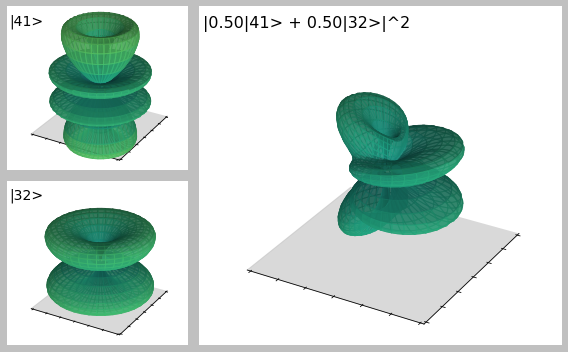

In [9]:
from mcu.harmonics import scenes as harmonic_scenes

qc = harmonic_scenes.QuantumCompute3D(h1, h2, space)
content_dir = qc.render()

# Draw a single frame
qc.draw_all(30, 0.5)

In [ ]:
gif_path = 'tmp/linear_combination.gif'
ffmpeg.image_directory_to_gif(content_dir, gif_path)

Image(open(gif_path,'rb').read())